<div dir="rtl">
    <p style="float: right;">
        <img src="IUT.png" width="130px" style="padding-left: 20px">
    </p>
    <h3 style="padding-top: 30px">
        دانشگاه صنعتی اصفهان
    <br/>
    <br/>
        مبانی یادگیری ماشین (نیمسال اول ۱۴۰۰)
    </h3>
</div>
<div dir="rtl">
    <br/>
    <br/>
    <hr style="border:3px solid black;width:100%" />
    <h1 style="text-align: center">
        تکلیف سری چهارم
    </h1>
    <hr style="border:1px solid black;width:100%" />
    <h3 style="text-align: center">
        مریم سعیدمهر
    </h3>
    <h3 style="text-align: center">
        شماره دانشجویی : ۹۶۲۹۳۷۳
    </h3>
</div>

<div dir="rtl" style="font-size: 17px">
    <h4 style="color: red; text-align: center;">
    در این تمرین میتوانید از توابع آماده موجود در کتابخانه هایی نظیر scikit-learn استفاده نمایید.
    </h4>
    <h3>
        🔵 سوال اول
    </h3>
    محموعه داده های آموزشی که درفایل Q1.csv قرار دارد شامل نمرات دانشجویان یک کلاس میباشد. ستون اول نمرات امتحان شفاهی و ستون دوم امتحانات کتبی درس از ۱۰۰ نمره میباشد. ستون سوم نیز نشان دهنده قبولی یا عدم قبولی شخص در آن درس است. هدف از این سوال طراحی یک مدل طبقه بند رگرسیون لاجستیک به منظور پیش بینی احتمال قبولی بر اساس نمرات امتحان هر شخص است.
    <h4>
        🔷 الف
    </h4>
    ابتدا ۷۰ درصد داده ها را به منظور آموزش طبقه بند و ۳۰ درصد باقیمانده را برای تست به صورت تصادفی ، تقسیم کرده و داده های آموزشی را توسط دو رنگ متفاوت نمایش دهید. (۰/۵ نمره)
</div>

In [1]:
import numpy as np
import pandas 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # to create manual legends for plot

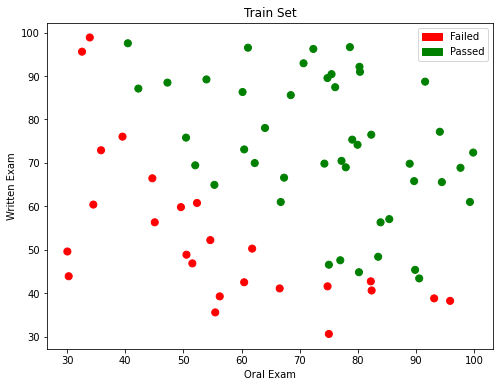

In [2]:
# Read CSV file related to the first question
raw_data = pandas.read_csv('Q1.csv', header=None, names=['Oral Exam','Written Exam', 'Pass/Fail'])

# Show first 5 rows of raw data
# print(raw_data.head())

# Divide 70% of the data for training and the remaining 30% for testing randomly,
Y = raw_data[['Pass/Fail']]
X = raw_data[['Oral Exam','Written Exam']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 6)

# Plot raw data with two color according to Pass/Fail column 
plt.figure(figsize=(8, 6))
colorMap = np.array(['r', 'g'])

plt.scatter(x_train['Oral Exam'],
            x_train['Written Exam'],
            s = 50,
            c = colorMap[y_train['Pass/Fail']])

plt.xlabel('Oral Exam')
plt.ylabel('Written Exam')
plt.title('Train Set')
red_patch = mpatches.Patch(color='red', label='Failed')
green_patch = mpatches.Patch(color='green', label='Passed')
plt.legend(handles=[red_patch, green_patch])
plt.show()

<div dir="rtl" style="font-size: 17px">
    <h4>
        🔷 ب
    </h4>
    یک طبقه بند رگرسیون لاجیستیک را بر روی داده های آموزشی آموزش داده و سپس دقت آن را هم بر روی داده های آموزشی و هم بر روی داده های تست به دست آورید.(۲ نمره)
</div>

In [3]:
model = LogisticRegression()
model.fit(x_train, y_train.values.ravel())
y_train_predict = model.predict(x_train)
print('Accuracy on Train Set: {:.2f}%'.format(accuracy_score(y_train,y_train_predict)*100))

y_test_predict = model.predict(x_test)
y_test_predict = pandas.DataFrame(y_test_predict, columns=['Pass/Fail'], index = y_test.index)
print('Accuracy on Test  Set: {:.2f}%'.format(accuracy_score(y_test, y_test_predict)*100))

Accuracy on Train Set: 88.57%
Accuracy on Test  Set: 93.33%


<div dir="rtl" style="font-size: 17px"> 
    <h4>
        🔷 ج
    </h4>
    مرز تصمیم این طبقه بند و داده های تست را رسم کنید. (۱/۵ نمره)
</div>

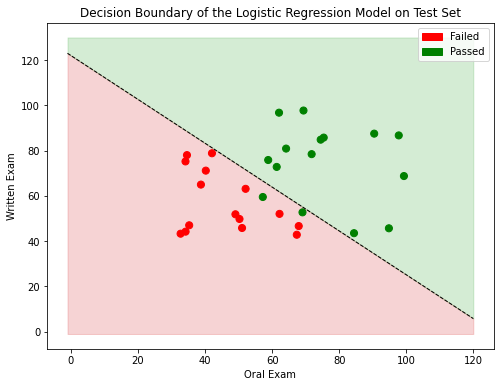

In [4]:
# Source : https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/

# Retrieve the model parameters.
b = model.intercept_[0]
w1, w2 = model.coef_.T

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 120
ymin, ymax = -1, 130
xd = np.array([xmin, xmax])
yd = m*xd + c

colorMap = np.array(['r', 'g'])
plt.figure(figsize=(8, 6))

plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:red', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:green', alpha=0.2)

plt.scatter(x_test['Oral Exam'],
            x_test['Written Exam'],
            s = 50,
            c = colorMap[y_test['Pass/Fail']])

plt.xlabel('Oral Exam')
plt.ylabel('Written Exam')
plt.title('Decision Boundary of the Logistic Regression Model on Test Set')
red_patch = mpatches.Patch(color='red', label='Failed')
green_patch = mpatches.Patch(color='green', label='Passed')
plt.legend(handles=[red_patch, green_patch])

plt.show()

<div dir="rtl" style="font-size: 17px">
    <h3>
        🔵 سوال دوم
    </h3>
    مجموعه داده های آموزشی که در فایل Q2.csv قرار دارد، نتایج دو آزمون بر روی میکروچیپ های تولیدی یک شرکت است. ستون سوم نشان دهنده پذیرش یا رد شدن هر چیپ میباشد. در این سوال یک طبقه بند رگرسیون لاجستیک منتظم <sup name=\"Regularized Logistic Regression\">1</sup> برای طبقه بندی این نتایج این آزمون ها طراحی خواهد شد.
    <h4>
        🔷 الف
    </h4>
    ابتدا ۷۰ درصد داده ها را به منظور آموزش طبقه بند و ۳۰ درصد باقیمانده را برای تست به صورت تصادفی ، تقسیم کرده و داده های آموزشی را توسط دو رنگ متفاوت نمایش دهید. (۰/۵ نمره)    
</div>
<br>

[//]: <> (--------------------------Footnot--------------------------)
<hr style="border:1px solid gray;width:20%;margin-left:0;" />
<sup>1</sup> <small>Regularized Logistic Regression</small>,

In [5]:
import numpy as np
import pandas 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # to create manual legends for plot

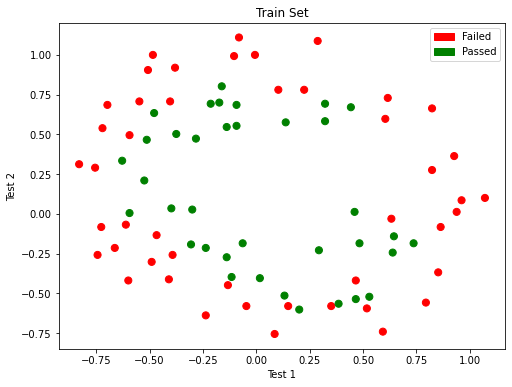

In [6]:
# Read CSV file related to the second question
raw_data = pandas.read_csv('Q2.csv', header=None, names=['Test 1','Test 2', 'Pass/Fail'])

# Show first 5 rows of raw data
# print(raw_data.head())

# Divide 70% of the data for training and the remaining 30% for testing randomly,
Y = raw_data[['Pass/Fail']]
X = raw_data[['Test 1','Test 2']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 6)

# Plot raw data with two color according to Pass/Fail column 
plt.figure(figsize=(8, 6))
colorMap = np.array(['r', 'g'])

plt.scatter(x_train['Test 1'],
            x_train['Test 2'],
            s = 50,
            c = colorMap[y_train['Pass/Fail']])

plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.title('Train Set')
red_patch = mpatches.Patch(color='red', label='Failed')
green_patch = mpatches.Patch(color='green', label='Passed')
plt.legend(handles=[red_patch, green_patch])
plt.show()

<div dir="rtl" style="font-size: 17px">
    <h4>
        🔷 ب
    </h4>
    در این سوال با توجه به عدم امکان تفکیک خطی ، نیاز است که داده های ورودی به یک فضای ویژگی پیچیده تر تصویر شده و سپس آموزش طبقه بند صورت گیرد. با بردن داده ها به یک فضای ویژگی پیچیده تر شامل تمام چند جمله ای های تا مرتبه ۴ ، طبقه بند را آموزش دهید.(۲/۵ نمره)
</div>

In [7]:
# Logistic Regression WITHOUT Regularization
poly = PolynomialFeatures(degree = 4)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

model = LogisticRegression(solver='saga', penalty='none', max_iter=10000)
# model = LogisticRegression(penalty='none', max_iter=1000)
# Actually in this case solver does not make any change !!!
model.fit(x_poly_train, y_train.values.ravel())

y_train_predict = model.predict(x_poly_train)
print('Accuracy on Train Set: {:.2f}%'.format(accuracy_score(y_train,y_train_predict)*100))

y_test_predict = model.predict(x_poly_test)
y_test_predict = pandas.DataFrame(y_test_predict, columns=['Pass/Fail'], index = y_test.index)
print('Accuracy on Test  Set: {:.2f}%'.format(accuracy_score(y_test, y_test_predict)*100))

Accuracy on Train Set: 86.59%
Accuracy on Test  Set: 72.22%


<div dir="rtl" style="font-size: 17px">
    <h4>
        🔷 ج
    </h4>
    برای جلوگیری از بیش برازش بر روی داده های آموزشی از پارامتر منتظم سازی استفاده میشود. با تغییر دادن این پارامتر و آموزش مجدد دقت را هم بر روی داده های آموزشی و داده های تست با هم مقابسه کنید. (۳ نمره)
</div>

In [8]:
# Logistic Regression WITH Regularization
poly = PolynomialFeatures(degree = 4)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=1, max_iter=10000)
"""
with Saga Solver :
- Accuracy on Train Set: 79.27%
- Accuracy on Test  Set: 77.78%
"""
# model = LogisticRegression(penalty='l2')
# """
# with lbfgs Solver :
# - Accuracy on Train Set: 80.49%
# - Accuracy on Test  Set: 75.00%
# """
model.fit(x_poly_train, y_train.values.ravel())

y_train_predict = model.predict(x_poly_train)
print('Accuracy on Train Set: {:.2f}%'.format(accuracy_score(y_train,y_train_predict)*100))

y_test_predict = model.predict(x_poly_test)
y_test_predict = pandas.DataFrame(y_test_predict, columns=['Pass/Fail'], index = y_test.index)
print('Accuracy on Test  Set: {:.2f}%'.format(accuracy_score(y_test, y_test_predict)*100))

Accuracy on Train Set: 79.27%
Accuracy on Test  Set: 77.78%


<div dir="rtl" style="font-size: 17px">
    <h3>
        🔵 سوال سوم
    </h3>
    در این سوال با استفاده از ماشین بردار پشتیبان ، یک طبقه بند برای دسته بندی دو کلاس طراحی خواهید کرد.
    <h4>
        🔷 الف
    </h4>
    با استفاده از داده های آموزشی موجود در فایل Q3_1.csv یک طبقه بند ماشین بردار پشتیبان آموزش دهید همچنین داده ها و مرز تصمیم را ترسیم کنید. با تغییر دادن پارامتر C در این طبقه بند تغییرات در مرز تصمیم را ترسیم و علت را توضیح دهید. (۲ نمره)   
</div>
<br>

In [9]:
import numpy as np
import pandas 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # to create manual legends for plot

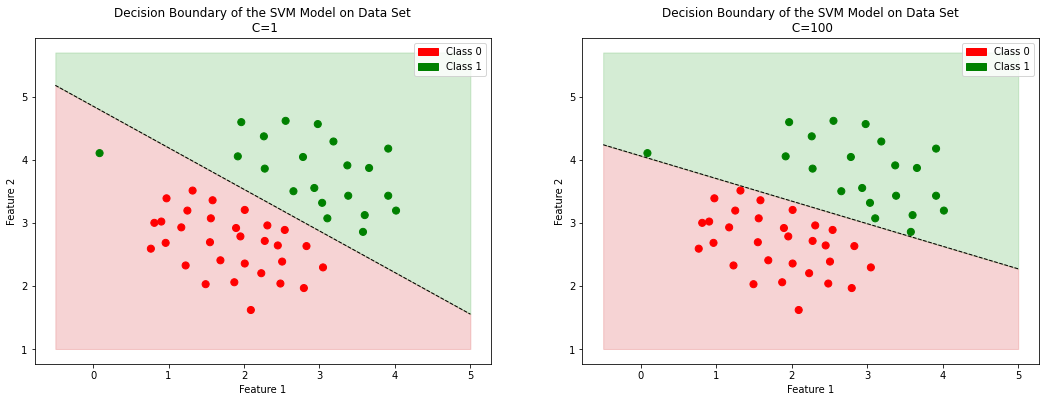

In [10]:
# Read CSV file related to the third question PART ONE
raw_data = pandas.read_csv('Q3_1.csv', header=None, names=['Feature 1','Feature 2', 'Class Type'])

# Show first 25 rows of raw data
# print(raw_data.head(25))

Y = raw_data[['Class Type']]
X = raw_data[['Feature 1','Feature 2']]

# Train first SVM Model with SMALL C PARAM
model1 = SVC(kernel='linear', C=1)
model1.fit(X, Y.values.ravel())

# Train first SVM Model with BIG C PARAM
model2 = SVC(kernel='linear', C=100)
model2.fit(X, Y.values.ravel())

# Plot the results
# Source : https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/
# Retrieve the model1 parameters.
b1 = model1.intercept_[0]
w1_1, w1_2 = model1.coef_.T

# Retrieve the model2 parameters.
b2 = model2.intercept_[0]
w2_1, w2_2 = model2.coef_.T

# Calculate the intercept and gradient of the decision boundary in model1
c1 = -b1/w1_2
m1 = -w1_1/w1_2

# Calculate the intercept and gradient of the decision boundary in model2
c2 = -b2/w2_2
m2 = -w2_1/w2_2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -0.5, 5
ymin, ymax = 1, 5.7
xd = np.array([xmin, xmax])
yd1 = m1*xd + c1
yd2 = m2*xd + c2

colorMap = np.array(['r', 'g'])
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.plot(xd, yd1, 'k', lw=1, ls='--')
plt.fill_between(xd, yd1, ymin, color='tab:red', alpha=0.2)
plt.fill_between(xd, yd1, ymax, color='tab:green', alpha=0.2)

plt.scatter(X['Feature 1'],
            X['Feature 2'],
            s = 50,
            c = colorMap[Y['Class Type']])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of the SVM Model on Data Set\n C=1')
red_patch = mpatches.Patch(color='red', label='Class 0')
green_patch = mpatches.Patch(color='green', label='Class 1')
plt.legend(handles=[red_patch, green_patch])


plt.subplot(122)
plt.plot(xd, yd2, 'k', lw=1, ls='--')
plt.fill_between(xd, yd2, ymin, color='tab:red', alpha=0.2)
plt.fill_between(xd, yd2, ymax, color='tab:green', alpha=0.2)

plt.scatter(X['Feature 1'],
            X['Feature 2'],
            s = 50,
            c = colorMap[Y['Class Type']])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of the SVM Model on Data Set\n C=100')
red_patch = mpatches.Patch(color='red', label='Class 0')
green_patch = mpatches.Patch(color='green', label='Class 1')
plt.legend(handles=[red_patch, green_patch])

plt.show()

<div dir="rtl" style="font-size: 17px">
    پارامتر C به بهینه سازی SVM می گوید که چقدر می خواهید از طبقه بندی نادرست هر مثال آموزشی جلوگیری کنید. برای مقادیر بزرگ C، بهینه‌سازی یک ابرصفحه با حاشیه کوچک‌تر را انتخاب می‌کند اگر آن ابرصفحه کار بهتری در طبقه‌بندی صحیح تمام نقاط آموزشی انجام دهد. برعکس، مقدار بسیار کوچک C باعث می‌شود که بهینه‌ساز به دنبال یک ابر صفحه جداکننده با حاشیه بزرگ‌تر باشد، حتی اگر آن ابر صفحه نقاط بیشتری را به اشتباه طبقه‌بندی کند. برای مقادیر بسیار کوچک C، باید نمونه‌های طبقه‌بندی اشتباهی دریافت کنید، حتی اگر داده‌های آموزشی شما به‌طور خطی قابل تفکیک باشند.
</div>

<div dir="rtl" style="font-size: 17px">
    <h4>
        🔷 ب
    </h4>
    داده های قسمت الف به صورت خطی تفکیک پذیر بود. به منظور تفکیک داده هایی که به صورت خطی تفکیک پذیر نیستند یک روش استفاده از کرنل های گوسی است. دراین قسمت داده های موجود در فایل Q3_2.csv را توسط ماشین بردار پشتیبان و کرنل های گوسی طبقه بندی کرده و داده ها را به همراه مرز تصمیم ترسیم نمایید.(۳ نمره)
</div>

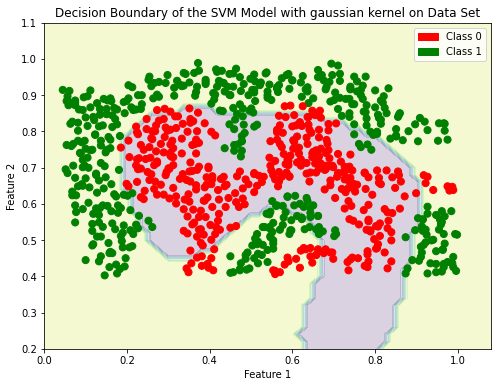

In [11]:
# Read CSV file related to the third question PART TWO
raw_data = pandas.read_csv('Q3_2.csv', header=None, names=['Feature 1','Feature 2', 'Class Type'])

# Show first 5 rows of raw data
# print(raw_data.head())

Y = raw_data[['Class Type']]
X = raw_data[['Feature 1','Feature 2']]

# Train first SVM Model
model = SVC(kernel='rbf') # gamma='scale' as default
model.fit(X, Y.values.ravel())

# Plot the data and the classification with the decision boundary.
colorMap = np.array(['r', 'g'])

# plot the decision surface
plt.figure(figsize=(8, 6))

xmin, xmax = 0, 1.1
ymin, ymax = 0.2, 1.1
xd, yd = np.meshgrid(np.arange(xmin, xmax, 0.02),
                     np.arange(ymin, ymax, 0.02))

boundary_decision = model.predict(np.array([xd.ravel(), yd.ravel()]).T)
boundary_decision = boundary_decision.reshape(xd.shape)
plt.contourf(xd, yd, boundary_decision, alpha=0.2)

plt.scatter(X['Feature 1'],
            X['Feature 2'],
            s = 50,
            c = colorMap[Y['Class Type']])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of the SVM Model with gaussian kernel on Data Set')
red_patch = mpatches.Patch(color='red', label='Class 0')
green_patch = mpatches.Patch(color='green', label='Class 1')
plt.legend(handles=[red_patch, green_patch])

plt.show()

<div dir="rtl" style="font-size: 17px">
    <h4>
        🔷 ج
    </h4>
    داده های آموزشی موجود در فایل Q3_3.csv را ابتدا به دو مجموعه آموزش و تست با نسبت ۷۰ به ۳۰ تقسیم کرده و سپس با استفاده از آموزش یک طبقه بند ماشین بردار پشتیبان و تغییر پارامترهایC و $ \gamma $  بر روی تمامی ترکیب های $ (0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30) $ بهترین مرز تصمیم برای داده های تست را یافته و آن را به همراه داده های تست رسم نمایید.(۲/۵ نمره)
</div>

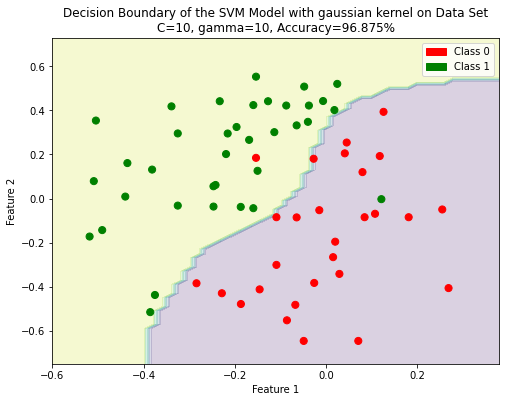

In [12]:
# Read CSV file related to the third question PART THREE
raw_data = pandas.read_csv('Q3_3.csv', header=None, names=['Feature 1','Feature 2', 'Class Type'])

# Show first 5 rows of raw data
# print(raw_data.head())

# Divide 70% of the data for training and the remaining 30% for testing randomly,
Y = raw_data[['Class Type']]
X = raw_data[['Feature 1','Feature 2']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 6)

accuracy = {}
for C in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
    for gamma in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
        # Train SVM Model with different C and gamma params
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(x_train, y_train.values.ravel())

        y_test_predict = model.predict(x_test)
        y_test_predict = pandas.DataFrame(y_test_predict, columns=['Class Type'], index = y_test.index)
        accuracy['{},{}'.format(C, gamma)] = accuracy_score(y_test, y_test_predict)*100

C_best, gamma_best = (max(accuracy, key = accuracy.get)).split(',', 1) 
C_best, gamma_best = int(C_best), int(gamma_best)
accuracy_best = max(accuracy.values())

# Train the Best Possible Model
model = SVC(kernel='rbf', C=C_best, gamma=gamma_best)
model.fit(x_train, y_train.values.ravel())

# Plot the data and the classification with the decision boundary.
colorMap = np.array(['r', 'g'])

# plot the decision surface
plt.figure(figsize=(8, 6))

xmin, xmax = -0.6, 0.4
ymin, ymax = -0.75, 0.75
xd, yd = np.meshgrid(np.arange(xmin, xmax, 0.02),
                     np.arange(ymin, ymax, 0.02))

boundary_decision = model.predict(np.array([xd.ravel(), yd.ravel()]).T)
boundary_decision = boundary_decision.reshape(xd.shape)
plt.contourf(xd, yd, boundary_decision, alpha=0.2)

plt.scatter(x_test['Feature 1'],
            x_test['Feature 2'],
            s = 50,
            c = colorMap[y_test['Class Type']])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of the SVM Model with gaussian kernel on Data Set\nC={}, gamma={}, Accuracy={}%'
          .format(C_best, gamma_best, accuracy_best))
red_patch = mpatches.Patch(color='red', label='Class 0')
green_patch = mpatches.Patch(color='green', label='Class 1')
plt.legend(handles=[red_patch, green_patch])

plt.show()

<div dir="rtl" style="font-size: 17px">
    <h3>
        🔵 سوال چهارم
    </h3>
    داده های آموزشی موجود در فایل Q4.csv دیتاست مشهور Iris است که ویژگی های اندازه گیری شده از سه نوع مختلف گل زنبق را نشان میدهد.
    <h4>
        🔷 الف
    </h4>
    ابتدا ۷۰ درصد داده ها را به منظور آموزش طبقه بند و ۳۰ درصد باقیمانده را برای تست به صورت تصادفی تقسیم نمیایید(۰/۵ نمره)   
</div>
<br>

In [13]:
import numpy as np
import pandas 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # to create manual legends for plot

In [14]:
# Read CSV file related to the fourth question
raw_data = pandas.read_csv('Q4.csv')

# Show first 5 rows of raw data
# print(raw_data.head())

# Divide 70% of the data for training and the remaining 30% for testing randomly,
Y = raw_data[['variety']]
X = raw_data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)

<div dir="rtl" style="font-size: 17px">
    <h4>
        🔷 ب
    </h4>
    یک طبقه بند K nearest neighbor به منظور تشخیص نوع گل زنبق آموزش دهید.(۱ نمره)
</div>

In [15]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train.values.ravel())
y_predict = model.predict(x_test)
print('Accuracy on Test Set: {:.2f}%'.format(accuracy_score(y_test, y_predict)*100))

Accuracy on Test Set: 95.56%


<div dir="rtl" style="font-size: 17px">
    <h4>
        🔷 ج
    </h4>
    میزان دقت بر روی داد های تست به ازای مقادیر مختلف K محاسبه کرده و روی یک نمودار نمایش دهید. با این کار مقدار بهینه K بر روی داده های تست محاسبه میشود. (۱ نمره)
</div>

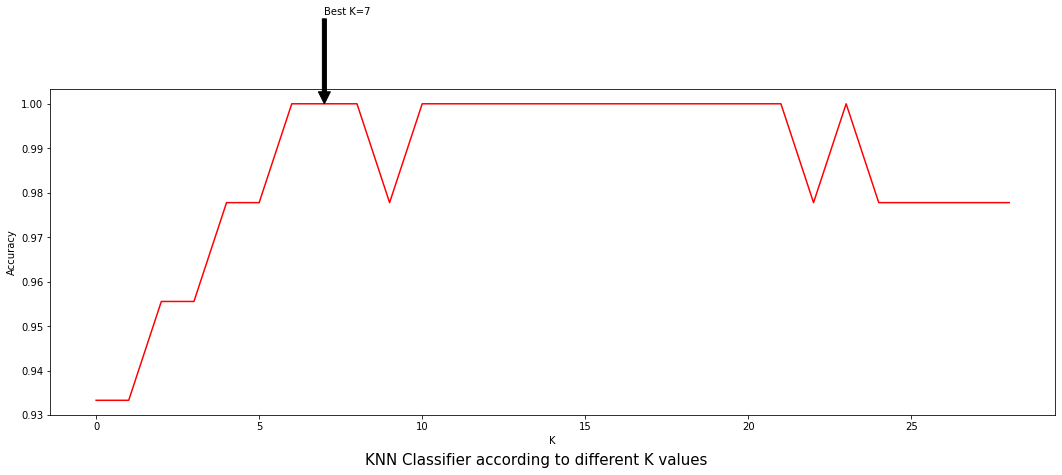

In [16]:
accuracy = []
for K in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=K)
    model.fit(x_train, y_train.values.ravel())
    y_predict = model.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_predict))
    
plt.figure(figsize=(18, 6))
plt.plot(range(0, 29), accuracy, c='r')

accuracy_max = max(accuracy)
k_max = accuracy.index(accuracy_max) + 1

plt.annotate('Best K={}'.format(k_max), xy=(k_max, accuracy_max), xytext=(k_max, accuracy_max+0.02),
            arrowprops=dict(facecolor='black', shrink=0.00005))

plt.xlabel("K")
plt.figtext(0.5, 0.01, "KNN Classifier according to different K values",
            wrap=True, horizontalalignment='center', fontsize=15)
plt.ylabel("Accuracy")
plt.show()

In [17]:
model = KNeighborsClassifier(n_neighbors=k_max)
model.fit(x_train, y_train.values.ravel())
y_predict = model.predict(x_test)
print('Accuracy on Test Set with K={} : {:.2f}%'.format(k_max, accuracy_score(y_test, y_predict)*100))

Accuracy on Test Set with K=7 : 100.00%
